# LAB 3: Training a Model

# Nupur, Paul, Priscilla, Jonathan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
#df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/AirBnB_NYC_2019.csv')

# df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# df['TotalCharges'] = df['TotalCharges'].fillna(0)

df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [3]:
# Q1 
df = df[["neighbourhood_group", "room_type", "latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]]

In [4]:
df = df.fillna(0)

In [5]:
df["neighbourhood_group"].mode()

0    manhattan
Name: neighbourhood_group, dtype: object

In [6]:
from sklearn.model_selection import train_test_split

df_train, df_all_test = train_test_split(df, test_size=0.4, random_state=42)

df_test, df_val = train_test_split(df_all_test, test_size=0.5, random_state=42)

In [7]:
y_train = df_train.pop('price')
y_val = df_val.pop('price')
y_test = df_test.pop('price')

In [8]:
df_train

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1261,manhattan,private_room,40.72006,-73.99579,6,18,0.21,1,0
19170,brooklyn,entire_home/apt,40.68048,-73.99322,4,8,0.24,1,0
45159,manhattan,entire_home/apt,40.75933,-73.98751,29,0,0.00,327,336
9085,brooklyn,entire_home/apt,40.67886,-73.96802,1,2,0.04,1,0
20490,manhattan,private_room,40.72087,-73.98079,1,2,0.15,1,0
...,...,...,...,...,...,...,...,...,...
11284,manhattan,shared_room,40.84650,-73.94319,1,0,0.00,1,0
44732,manhattan,private_room,40.73957,-74.00082,2,4,1.90,1,76
38158,manhattan,entire_home/apt,40.78318,-73.97372,30,1,0.34,5,261
860,manhattan,entire_home/apt,40.77508,-73.97990,2,11,0.13,1,2


# Q2

In [9]:
df_train.corr()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.087732,0.027252,-0.010080,-0.014699,0.019442,-0.005975
longitude,0.087732,1.000000,-0.067251,0.058775,0.132226,-0.116669,0.080776
minimum_nights,0.027252,-0.067251,1.000000,-0.085092,-0.127316,0.124060,0.141089
number_of_reviews,-0.010080,0.058775,-0.085092,1.000000,0.581124,-0.072687,0.176481
reviews_per_month,-0.014699,0.132226,-0.127316,0.581124,1.000000,-0.047254,0.166533
calculated_host_listings_count,0.019442,-0.116669,0.124060,-0.072687,-0.047254,1.000000,0.222986
availability_365,-0.005975,0.080776,0.141089,0.176481,0.166533,0.222986,1.000000


In [10]:
# highest correlated: number_of_reviews & reviews_per_month

In [11]:
# creating Price into binary called 'above_average' -- GIVEN IT A DIFFERENT NAME.

In [12]:
y_train_binarised = y_train.apply(lambda v: 1 if v >= 152 else 0)

In [13]:
y_val_binarised = y_val.apply(lambda v: 1 if v >= 152 else 0)

In [14]:
y_test_binarised = y_test.apply(lambda v: 1 if v >= 152 else 0)

# Q3

In [15]:
from sklearn.metrics import mutual_info_score

categorical = ['neighbourhood_group','room_type']

def calculate_mi(series):
    return mutual_info_score(series, y_train_binarised)

df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

display(df_mi.head(1).round(2)) # the most useful features according to the mutual information score
display(df_mi.tail(1).round(2)) # the least useful features according to the mutual information score

,MI
room_type,0.14


,MI
neighbourhood_group,0.05


# Q4

In [16]:
from sklearn.feature_extraction import DictVectorizer

# convert data frame to dictionary
train_dict = df_train.to_dict(orient='records')

In [17]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [18]:
dv.get_feature_names() 

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=bronx',
 'neighbourhood_group=brooklyn',
 'neighbourhood_group=manhattan',
 'neighbourhood_group=queens',
 'neighbourhood_group=staten_island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=entire_home/apt',
 'room_type=private_room',
 'room_type=shared_room']

In [19]:
X_train = dv.transform(train_dict)
X_train.shape

(29337, 15)

In [20]:
# model can only take a Numpy array

In [21]:
# Model Generation
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42) # C is the regularisation parameter
model.fit(X_train, y_train_binarised)

/home/paul/.cache/pypoetry/virtualenvs/leads-XIT8lGUS-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [22]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [23]:
model.predict_proba(X_val)

array([[0.98806283, 0.01193717],
       [0.95015621, 0.04984379],
       [0.97110132, 0.02889868],
       ...,
       [0.97400295, 0.02599705],
       [0.523881  , 0.476119  ],
       [0.0569672 , 0.9430328 ]])

In [24]:
model.classes_

array([0, 1])

In [25]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.01193717, 0.04984379, 0.02889868, ..., 0.02599705, 0.476119  ,
       0.9430328 ])

In [26]:
above_average = y_pred > 0.5

In [27]:
accuracy = (y_val_binarised == above_average).mean()
# this is the accuracy

print(f"Rounded accuracy {accuracy.round(2)}")

Rounded accuracy 0.79


# Q5

In [28]:
def feature_selection_feature_elimination(df_train, df_val, y_train_binarised, y_val_binarised, original_accuracy):
    columns = df_train.columns
    for column_to_leave_out in columns:
        df_train_without_column = df_train.drop(columns=column_to_leave_out)
        df_val_without_column = df_val.drop(columns=column_to_leave_out)
        
        train_dict = df_train_without_column.to_dict(orient='records')
        val_dict = df_val_without_column.to_dict(orient='records')
        dv = DictVectorizer(sparse=False)
        dv.fit(train_dict)
        
        X_train = dv.transform(train_dict)
        X_val = dv.transform(val_dict)
        model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42) # C is the regularisation parameter
        model.fit(X_train, y_train_binarised)
        
        y_pred = model.predict(X_val)
        
        accuracy = (y_val_binarised == y_pred).mean().round(2)
        
        print(f"Accuracy without feature {column_to_leave_out} was {accuracy}, a difference of {round(abs(accuracy - original_accuracy), 2)}")
    
feature_selection_feature_elimination(df_train, df_val, y_train_binarised, y_val_binarised, accuracy)

# Number of reviews and reviews per month being dropped shows no difference

Accuracy without feature neighbourhood_group was 0.75, a difference of 0.04


/home/paul/.cache/pypoetry/virtualenvs/leads-XIT8lGUS-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy without feature room_type was 0.72, a difference of 0.07


/home/paul/.cache/pypoetry/virtualenvs/leads-XIT8lGUS-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy without feature latitude was 0.79, a difference of 0.0


/home/paul/.cache/pypoetry/virtualenvs/leads-XIT8lGUS-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy without feature longitude was 0.79, a difference of 0.0


/home/paul/.cache/pypoetry/virtualenvs/leads-XIT8lGUS-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy without feature minimum_nights was 0.79, a difference of 0.0


/home/paul/.cache/pypoetry/virtualenvs/leads-XIT8lGUS-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy without feature number_of_reviews was 0.79, a difference of 0.0


/home/paul/.cache/pypoetry/virtualenvs/leads-XIT8lGUS-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy without feature reviews_per_month was 0.79, a difference of 0.0


/home/paul/.cache/pypoetry/virtualenvs/leads-XIT8lGUS-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy without feature calculated_host_listings_count was 0.79, a difference of 0.0
Accuracy without feature availability_365 was 0.79, a difference of 0.0


/home/paul/.cache/pypoetry/virtualenvs/leads-XIT8lGUS-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Q6

LR: 0.859092 (0.006399)
Score for each of the 10 K-fold tests:  [0.85922203 0.86251896 0.85881726 0.86152564 0.85648699 0.8668513
 0.85749518 0.84203265 0.86360667 0.86236524]
LogisticRegression(solver='liblinear')
	Training time: 0.000s
	Prediction time: 1.877s

LDA: 0.861586 (0.006452)
Score for each of the 10 K-fold tests:  [0.86303435 0.86477086 0.86040615 0.86471728 0.85713797 0.86945195
 0.86066753 0.84488277 0.86647444 0.86431737]
LinearDiscriminantAnalysis()
	Training time: 0.000s
	Prediction time: 0.788s

KNN: 0.723083 (0.010043)
Score for each of the 10 K-fold tests:  [0.72773    0.71867559 0.72807695 0.72714236 0.72382699 0.73610799
 0.71647215 0.70958568 0.73781993 0.70539412]
KNeighborsClassifier()
	Training time: 0.000s
	Prediction time: 1.195s

CART: 0.727205 (0.013890)
Score for each of the 10 K-fold tests:  [0.71528232 0.7153099  0.71653424 0.73504658 0.72426595 0.74752985
 0.7505271  0.70574526 0.72800222 0.73380391]
DecisionTreeClassifier()
	Training time: 0.000s
	Pr

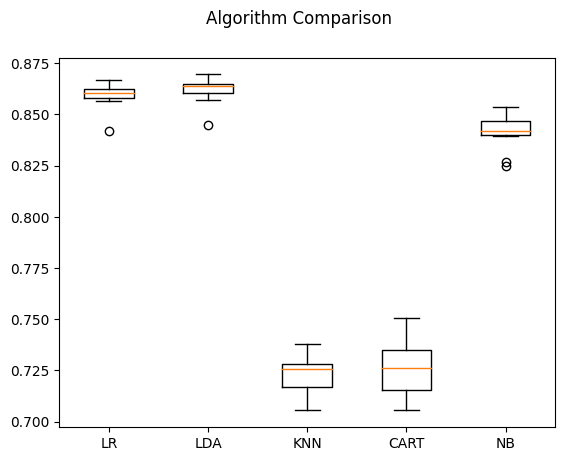

In [29]:
# Compare Algorithms with the Algorithm Harness
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
# you can also use other metrics to score your models: https://iqcode.com/code/python/sklearn-cross-val-score-scoring-options
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train_binarised, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [31]:
# Removed SVC due to impractically long train time
# Top 3 remaining are Logistic Regression, Linear Discriminant Analysis and Gaussian Naive Bayes

# Q7

In [50]:
y_train_log =  y_train#np.log(y_train)
y_val_log = y_val#np.log(y_val)

from sklearn.linear_model import Ridge


In [57]:


def find_best_alpha():
    alphas = [0, 0.01, 0.1, 1, 10]
    for a in alphas:
        clf = Ridge(alpha=a)
        clf.fit(X_train, y_train_log)
        
        y_pred = clf.predict(X_val)
        print(f"Alpha {a} gives RMSE {np.sqrt(np.sum((y_val_log - y_pred) ** 2) / len(y_pred)).round(3)}")

In [58]:
find_best_alpha()


Alpha 0 gives RMSE 188.524
Alpha 0.01 gives RMSE 188.248
Alpha 0.1 gives RMSE 188.247
Alpha 1 gives RMSE 188.243
Alpha 10 gives RMSE 188.257


In [53]:
y_val_log

29280      35
48677     185
9159       35
20915      85
15965      45
         ... 
2896     1200
38936      42
29302      80
2638      450
45937     180
Name: price, Length: 9779, dtype: int64

array([[ 19.     ,   1.     ,  40.67757, ...,   0.     ,   1.     ,
          0.     ],
       [175.     ,   2.     ,  40.64454, ...,   0.     ,   1.     ,
          0.     ],
       [  0.     ,   1.     ,  40.69034, ...,   0.     ,   1.     ,
          0.     ],
       ...,
       [  0.     ,   1.     ,  40.71239, ...,   0.     ,   1.     ,
          0.     ],
       [258.     ,   1.     ,  40.68996, ...,   1.     ,   0.     ,
          0.     ],
       [302.     , 327.     ,  40.76067, ...,   1.     ,   0.     ,
          0.     ]])

In [44]:
np.any(np.isinf(X_val))

False

In [45]:
X_train.()

1250.0

In [47]:
np.isinf(X_val).any()
#np.isfinite(X_val).all()

False

In [48]:
np.isinf(y_train_log).any()

True